In [9]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter

dataset = pd.read_csv('/Users/eddie/Downloads/Agriculture Data.xlsx - Sheet1 (1).csv')

X = pd.DataFrame(dataset.iloc[:,:11].values)
Y = pd.DataFrame(dataset.iloc[:,11:].values)
print(X)
print(Y)
# oversample = SMOTE(sampling_strategy=1)
# X_train, Y_train = oversample.fit_resample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
counter = Counter(Y)
print(counter)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,:16])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10
0      3   2   2  25  26   9   0   0   0   0   0
1      3   3   1  61  17   9   0   0   0   0   0
2      3   3   1  65  16   9   0   0   0   0   0
3      3   2   1  49  17   9   0   0   0   1   0
4      3   1   1  59  28   9   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2416   1   1   1  50  25   9   0   0   0   0   0
2417   1   2   1  58  49   8   0   0   0   0   0
2418   1   2   1   3  36   9   0   0   0   0   0
2419   3   2   2  48  40   9   0   0   0   0   0
2420   1   1   1  81  37   7   0   0   0   0   0

[2421 rows x 11 columns]
      0
0     0
1     1
2     1
3     0
4     1
...  ..
2416  1
2417  0
2418  1
2419  0
2420  1

[2421 rows x 1 columns]
Counter({0: 1})
(1936, 11)
(1936, 1)
Index(['Location of Incident', 'Time', 'Gender', 'Age', 'State',
       'Injury Agent ', 'Confined Space', 'Grain Involved', 'Alcohol/Drugs',
       'Seatbelt', 'Helmet', 'Fatal'],
      dtype='object')


In [10]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 

In [11]:
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
def objective(max_depth, min_samples_split,min_samples_leaf):
    model = DecisionTreeClassifier(max_depth = int(max_depth),
                                  min_samples_split =int( min_samples_split), min_samples_leaf = int(min_samples_split))
    
    return cross_val_score(model, X_train, Y_train, cv=10,scoring = 'roc_auc').mean()
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2,50),
    'min_samples_leaf':(1,50)
}
optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)
best_params = optimizer.max['params']

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.5731    | 8.116     | 47.59     | 37.14     |
| 2         | 0.5535    | 12.37     | 8.645     | 9.488     |
| 3         | 0.569     | 2.104     | 43.44     | 30.85     |
| 4         | 0.5769    | 14.45     | 2.009     | 48.56     |
| 5         | 0.5583    | 16.82     | 11.4      | 10.73     |
| 6         | 0.5802    | 15.52     | 19.51     | 50.0      |
| 7         | 0.5797    | 20.0      | 38.26     | 50.0      |
| 8         | 0.5288    | 20.0      | 50.0      | 2.0       |
| 9         | 0.5338    | 1.0       | 34.86     | 50.0      |
| 10        | 0.5704    | 20.0      | 27.79     | 38.13     |
| 11        | 0.5769    | 20.0      | 10.52     | 39.43     |
| 12        | 0.5789    | 20.0      | 50.0      | 45.6      |
| 13        | 0.5338    | 1.0       | 1.0       | 37.13     |
| 14        | 0.58      | 20.0      | 10.41     | 50.0      |
| 15    

In [12]:
# Initialize Random Forest regressor
model = DecisionTreeClassifier(min_samples_split = int(best_params['min_samples_split']), min_samples_leaf = int(best_params['min_samples_leaf']), max_depth = int(best_params['max_depth']) ,random_state=42)

# Train the model
model.fit(X_train, Y_train)




DecisionTreeClassifier(max_depth=15, min_samples_leaf=19, min_samples_split=50,
                       random_state=42)

In [13]:
print(int(best_params['min_samples_split']))
print(int(best_params['min_samples_leaf']))
print(int(best_params['max_depth']))

50
19
15


In [14]:
res = model.predict(X_test)
print(res)
print(Y_test)

[1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1]
      0
1931  1

In [15]:
res = np.array(res)
print(res)

[1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1]


In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.709278350515464
              precision    recall  f1-score   support

           0   0.527273  0.201389  0.291457       144
           1   0.732558  0.923754  0.817121       341

    accuracy                       0.709278       485
   macro avg   0.629915  0.562571  0.554289       485
weighted avg   0.671607  0.709278  0.661047       485



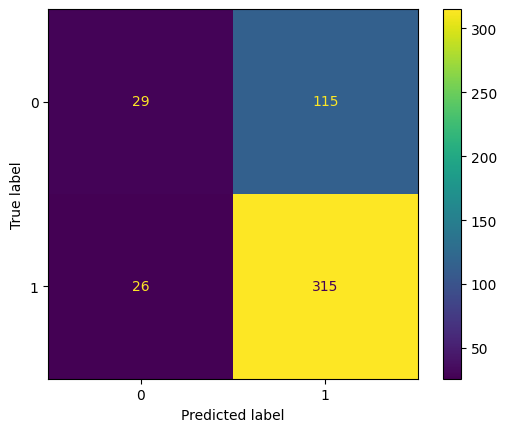

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


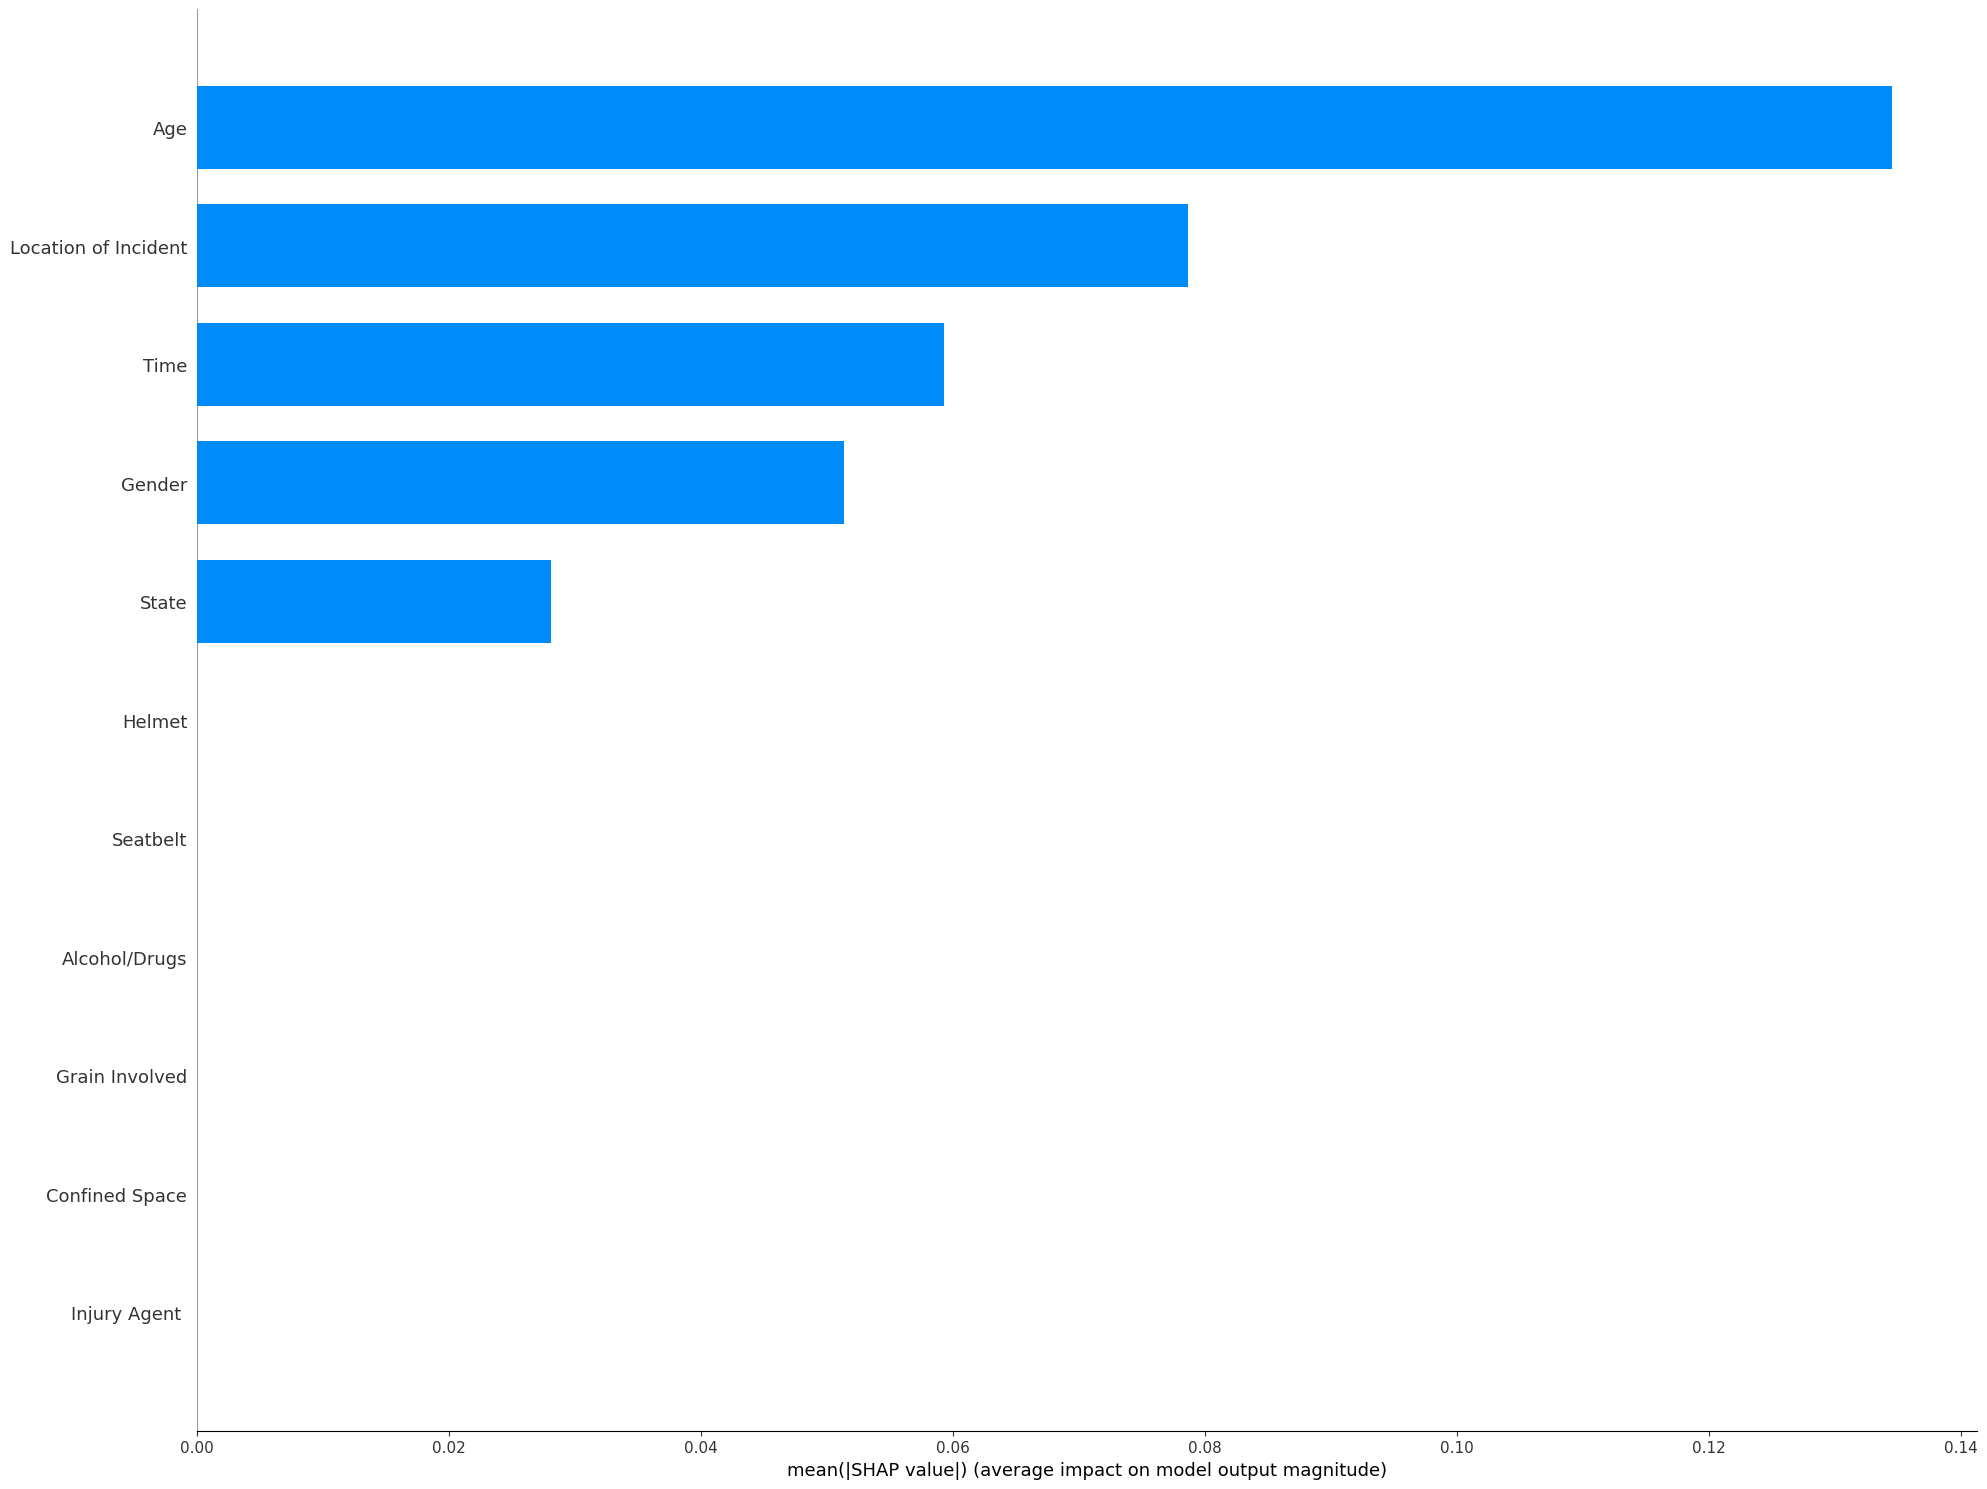

In [18]:
import shap
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)

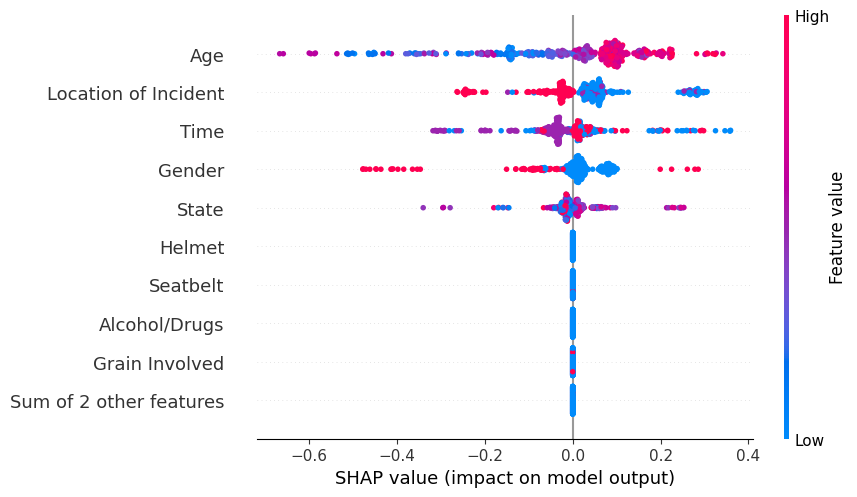

In [19]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)